### Marine Acoustics Workbook

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Figures appear in notebook inline
%matplotlib inline


### Read .wav audio

In [2]:
# File path to .wav file
audio_file_path = "../data/humpback.wav"
filename = audio_file_path.split('/')[-1]

# Read entire mono .wav file using default sampling rate
y, sr = librosa.load(audio_file_path, sr=None, mono=True, offset=0.0, duration=None)
print(f'Loaded file: {filename}\n--------------------------------\n\
Duration: {y.size/sr} seconds\n--------------------------------\n\
Sample rate: {sr} Hz\n--------------------------------\n')



Loaded file: humpback.wav
--------------------------------
Duration: 255.65 seconds
--------------------------------
Sample rate: 4000 Hz
--------------------------------



### Functions

In [3]:
def slice_data(data, frame_length, hop_length):
    """Slice 1D array into frames with a given overlap"""
    frame_view = librosa.util.frame(data, frame_length=frame_length, hop_length=hop_length, axis=0)
    
    return frame_view


def plot_waveform(y, sr, axis='s', offset=0.0, title='Audio Waveform', xlabel='Time (s)', ylabel='Amplitude'):
    """Plot the signal waveform in the time domain"""

    # Plot
    plt.figure()
    librosa.display.waveshow(y, sr=sr, max_points=sr//2, axis=axis, offset=offset)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


def plot_spectrogram(y, sr, n_fft=256, hop_length=128, title='Spectrogram', xlabel='Time (s)', ylabel='Frequency (Hz)'):
    """Plot the signal spectrogram"""

    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, window='hann')  # STFT of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)    # Power spectrogram?

    # Plot
    plt.figure()
    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='s', y_axis='linear')
    plt.colorbar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)



### Slice signal into frames

In [4]:
# Set frame size and step size
frame_length = 100
hop_length = frame_length//2

# Create view of sliced signal
y_frames = slice_data(y, frame_length, hop_length)
print(f'Number of frames: {y_frames.shape[0]}\nFrame duration: {1000*frame_length/sr} ms\nOverlap: {100*hop_length/frame_length}%')


Number of frames: 20451
Frame duration: 25.0 ms
Overlap: 50.0%


### Plot the audio waveform

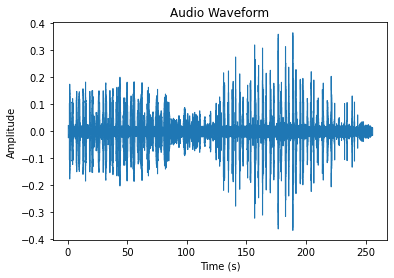

In [5]:
plot_waveform(y, sr)


### Plot the spectrogram

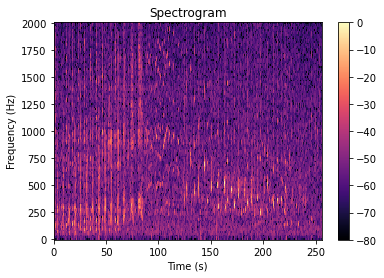

In [6]:
plot_spectrogram(y, sr)
